# HT3 Modelos de regresion lineal

Integrantes: 
- Francis Aguilar #22243
- Angela Garcia #22869

Del conjunto de archivos proporcionados son: 

- data_description.txt: descripcion de cada columna proporcinado por el conjunto de datos a trabajar

- train.csv: el conjunto de training

- test.csv: el conjunto de test
 
- sample_submission.csv: presentacion de un punto de referencia a partir de una regresion lineal sobre el año y mes de venta.


Pero el único archivo que se usará es: train.csv.

In [14]:
# importacion de librerias 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [15]:
#cargar los datos
df_train = pd.read_csv("train.csv")

---
# 2. Análisis exploratorio

Obtener una primera impresión del conjunto de datos para identificar posibles áreas que requieran una exploración más profunda. Aquí es donde averiguaremos si es necesario noramlizar los datos.

In [16]:
#exploracion de datos
#mostrar las columanas
print("\n--Columnas:---")
print(list(df_train.columns))
print(df_train.shape)
#resumen del set de datos
print("\n--Resumen del set de datos:--")
df_train.describe()



--Columnas:---
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Poo

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
df_train.describe(include="O")  # Estadísticas de las variables categóricas

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [18]:
print(df_train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

## Variables

esta descripcion es tomada de https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

SalePrice: Precio de venta de la propiedad en dólares. Esta es la variable objetivo que se intenta predecir.  
MSSubClass: Clase de edificio.  
MSZoning: Clasificación general de zonificación.  
LotFrontage: Pies lineales de calle conectados a la propiedad.  
LotArea: Tamaño del terreno en pies cuadrados.  
Street: Tipo de acceso vial.  
Alley: Tipo de acceso por callejón.  
LotShape: Forma general de la propiedad.  
LandContour: Planitud del terreno.  
Utilities: Tipo de servicios públicos disponibles.  
LotConfig: Configuración del terreno.  
LandSlope: Inclinación del terreno.  
Neighborhood: Ubicación física dentro de los límites de la ciudad de Ames.  
Condition1: Proximidad a carretera principal o vía de tren.  
Condition2: Proximidad a carretera principal o vía de tren (si hay una segunda).  
BldgType: Tipo de vivienda.  
HouseStyle: Estilo de vivienda.  
OverallQual: Calidad general de materiales y acabados.  
OverallCond: Calificación general del estado de la propiedad.  
YearBuilt: Año de construcción original.  
YearRemodAdd: Año de remodelación.  
RoofStyle: Tipo de techo.  
RoofMatl: Material del techo.  
Exterior1st: Revestimiento exterior principal de la casa.  
Exterior2nd: Revestimiento exterior secundario (si hay más de un material).  
MasVnrType: Tipo de revestimiento de mampostería.  
MasVnrArea: Área de revestimiento de mampostería en pies cuadrados.  
ExterQual: Calidad del material exterior.  
ExterCond: Estado actual del material exterior.  
Foundation: Tipo de cimiento.  
BsmtQual: Altura del sótano.  
BsmtCond: Estado general del sótano.  
BsmtExposure: Nivel del sótano respecto al jardín o salida.  
BsmtFinType1: Calidad del área terminada del sótano.  
BsmtFinSF1: Pies cuadrados terminados tipo 1 del sótano.  
BsmtFinType2: Calidad de una segunda área terminada del sótano (si existe).  
BsmtFinSF2: Pies cuadrados terminados tipo 2 del sótano.  
BsmtUnfSF: Pies cuadrados sin terminar del sótano.  
TotalBsmtSF: Total de pies cuadrados del sótano.  
Heating: Tipo de calefacción.  
HeatingQC: Calidad y estado de la calefacción.  
CentralAir: Aire acondicionado central.  
Electrical: Sistema eléctrico.  
1stFlrSF: Pies cuadrados del primer piso.  
2ndFlrSF: Pies cuadrados del segundo piso.  
LowQualFinSF: Pies cuadrados de acabado de baja calidad (en todos los pisos).  
GrLivArea: Área habitable sobre nivel del suelo en pies cuadrados.  
BsmtFullBath: Baños completos en el sótano.  
BsmtHalfBath: Medios baños en el sótano.  
FullBath: Baños completos sobre nivel del suelo.  
HalfBath: Medios baños sobre nivel del suelo.  
Bedroom: Número de dormitorios sobre el nivel del sótano.  
Kitchen: Número de cocinas.  
KitchenQual: Calidad de la cocina.  
TotRmsAbvGrd: Total de habitaciones sobre nivel del suelo (sin incluir baños).  
Functional: Calificación de funcionalidad de la vivienda.  
Fireplaces: Número de chimeneas.  
FireplaceQu: Calidad de la chimenea.  
GarageType: Ubicación del garaje.  
GarageYrBlt: Año de construcción del garaje.  
GarageFinish: Acabado interior del garaje.  
GarageCars: Capacidad del garaje en cantidad de autos.  
GarageArea: Tamaño del garaje en pies cuadrados.  
GarageQual: Calidad del garaje.  
GarageCond: Estado del garaje.  
PavedDrive: Entrada pavimentada.  
WoodDeckSF: Área de la terraza de madera en pies cuadrados.  
OpenPorchSF: Área del porche abierto en pies cuadrados.  
EnclosedPorch: Área del porche cerrado en pies cuadrados.  
3SsnPorch: Área del porche de tres estaciones en pies cuadrados.  
ScreenPorch: Área del porche con malla en pies cuadrados.  
PoolArea: Área de la piscina en pies cuadrados.  
PoolQC: Calidad de la piscina.  
Fence: Calidad de la cerca.  
MiscFeature: Característica miscelánea no cubierta en otras categorías.  
MiscVal: Valor en dólares de la característica miscelánea.  
MoSold: Mes de venta.  
YrSold: Año de venta.  
SaleType: Tipo de venta.  
SaleCondition: Condición de la venta.  
id: ID de la venta.


Tipo de variables:
Variables cualitativas:

Ordinales:
- OverallQual
- OverallCond
- ExterQual
- ExterCond
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- HeatingQC
- KitchenQual
- FireplaceQu
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence


Norminales:
- MSZoning
- Street
- Alley
- LotShape
- LandContour
- Utilities
- LotConfig
- LandSlope
- Neighborhood
- Condition1
- Condition2
- BldgType
- HouseStyle
- RoofStyle
- RoofMatl
- Exterior1st
- Exterior2nd
- MasVnrType
- Foundation
- Heating
- CentralAir
- Electrical
- Functional
- GarageType
- PavedDrive
- MiscFeature
- SaleType
- SaleCondition

Variables cuantitativas:

Continuas:
- LotFrontage
- LotArea
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal
- SalePrice

discretras:
- MSSubClass
- YearBuilt
- YearRemodAdd
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- Bedroom
- Kitchen
- TotRmsAbvGrd
- Fireplaces
- GarageCars
- GarageYrBlt
- MoSold
- YrSold

In [19]:
#obtener el tipo de datos
print("\n----Tipo de datos:---")
# print(df_train.dtypes)
df_train.info()

tipos_de_datos = df_train.dtypes.value_counts()

print('resumen:')
print(tipos_de_datos)   


----Tipo de datos:---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null 

### Variables que no se tomarán en cuenta por falta de datos
No se tomarán en cuenta las siguiente variables porque tienen demasiados datos faltantes, según las respuestas anteriores, estar variables no nos serán de utilidad.   
Demasiados datos faltantes, irrelevante para el análisis   
- **Alley** 91 non-null / 1460 registros 
- **MasVnrType** 588 non-null / 1460
- **FireplaceQu** 770 non-null / 1460
- **PoolQC** 7 non-null / 1460
- **Fence** 281 non-null / 1460    
- **MiscFeature** 54 non-null / 1460

In [20]:
print(df_train.shape)
# Eliminar las columnas 
columnas_a_eliminar = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']  # Reemplaza con los nombres de las columnas que deseas eliminar
df_train = df_train.drop(columns=columnas_a_eliminar)
print(df_train.shape)
print("Se eliminaron un total de 6 columnas")

(1460, 81)
(1460, 75)
Se eliminaron un total de 6 columnas


## Análisis de la variable que se quiere predecir (SalePrice)

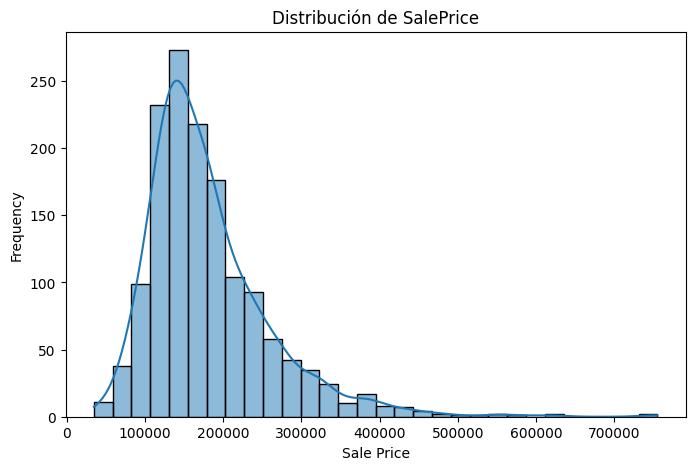

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df_train["SalePrice"], kde=True, bins=30)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribución de SalePrice")
plt.show()

#### Interpretación de la gráfica 
Lo que se puede ver en la distribución de SalesPrice es que esta sesgada a la derecha. Esto puede darse debido a datos atípos que la sesgan, que son los precios más altos, ya que al parecer son los menos comunes

## Gráfica de correlación entre variables

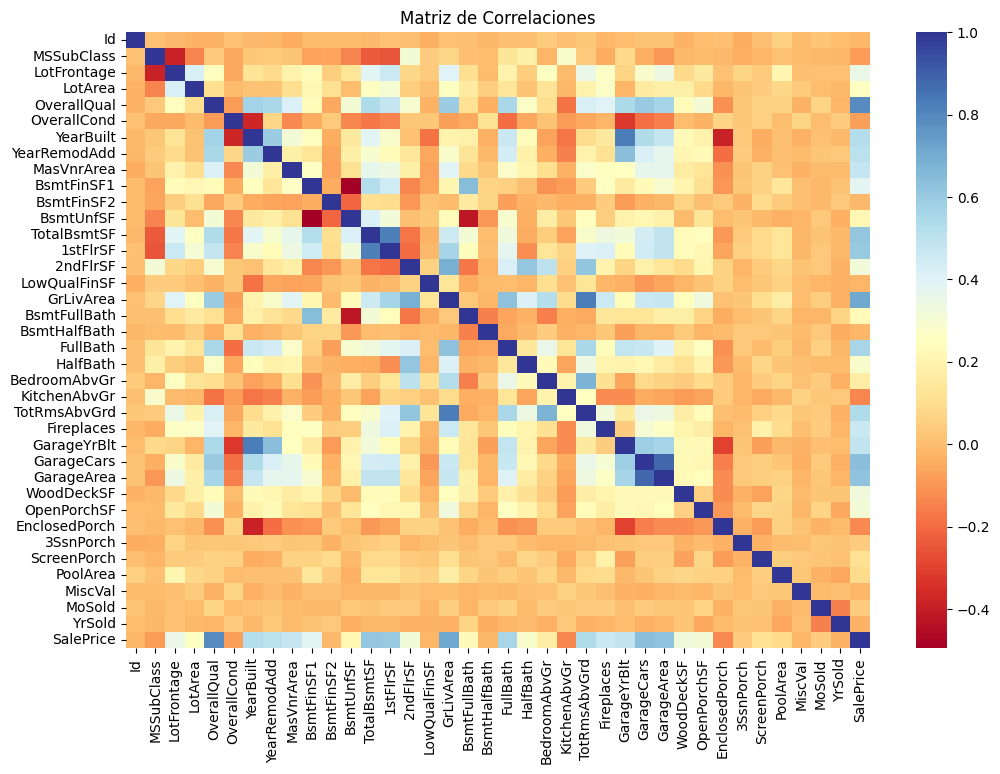

In [22]:
correlation_matrix = df_train.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='RdYlBu', annot=False, fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()

#### Interpretación de la gráfica
Podemos observar una fuerte relación entre SalesPrice y las siguientes variables destacadas en el mapa   
- OverallQUal 
- YearBuilt
- YearRemodAdd
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- FullBath
- TotRmsAbvGrd
- GarageYrBlt
- GarageCars
- GarageArea

Analizaremos la variable más fuertemente relacionada a SalesPrice, **OverallQual**, esta variables nos indica la calidad del material.   

#### Visualización del precio de venta promedio por calidad general:

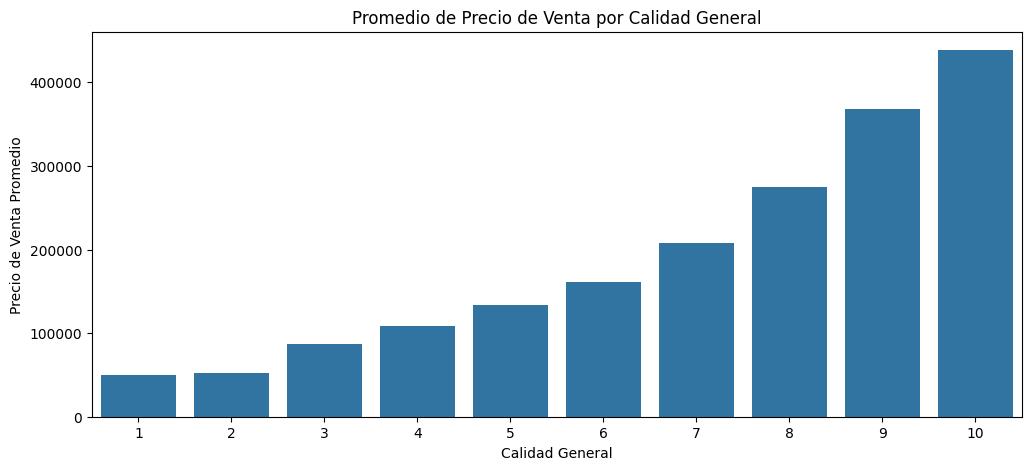

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

In [23]:
quality_groups = df_train.groupby('OverallQual')['SalePrice'].mean()

plt.figure(figsize=(12, 5))
sns.barplot(x=quality_groups.index, y=quality_groups.values)
plt.title("Promedio de Precio de Venta por Calidad General")
plt.xlabel("Calidad General")
plt.ylabel("Precio de Venta Promedio")
plt.show()


quality_groups

### Análisis de relación entre OverallQual y SalePrice


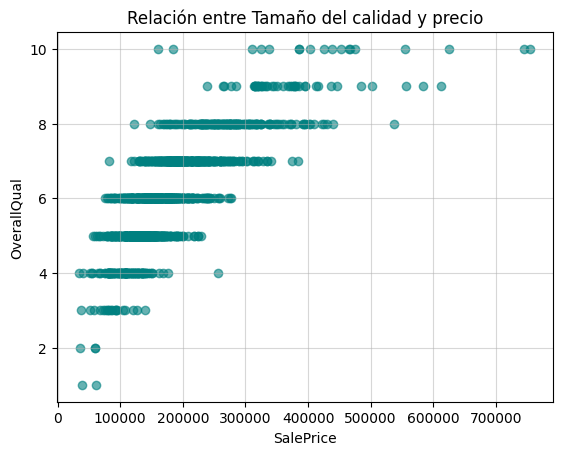

In [24]:
plt.scatter(df_train['SalePrice'], df_train['OverallQual'], color='teal', alpha=0.6)
plt.title('Relación entre Tamaño del calidad y precio')
plt.ylabel('OverallQual')
plt.xlabel('SalePrice')
plt.grid(alpha=0.5)
plt.show()

##### Resultados de la gráfica
Podemos observar que por más que pareciera haber una tendencia de los datos igual hay un rango consideradamente grande entre los precios, especialmente mientras mayor sea la calidad general del material 

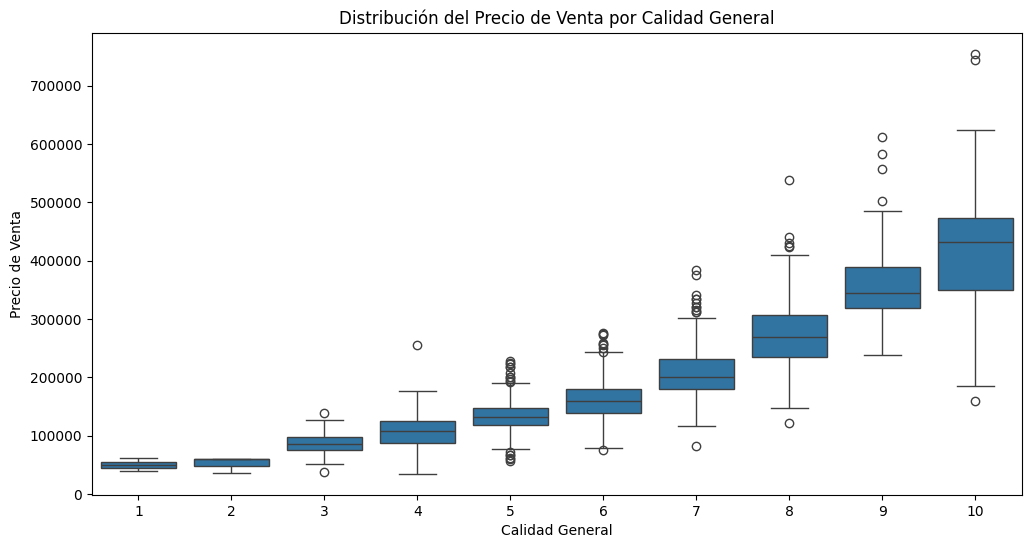

In [25]:

# Crear la gráfica de caja y bigotes para 'OverallQual' vs 'SalePrice'
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df_train)
plt.title("Distribución del Precio de Venta por Calidad General")
plt.xlabel("Calidad General")
plt.ylabel("Precio de Venta")
plt.show()

Se pueden observar muchos datos atípicos para cada uno de las ventas segun la cualidad que se usó. 

### Hallazgos generales de los conjuntos de datos

La variable objetico que es la de SalesPrice, esta sesgada a la derecha, por lo cual es recomendable normalizar los datos para evitar sesgos en el modelo. Ya que, las variables tienen diferentes escalas y unidades.

### Tendencia de agrupamiento

---
# 1. modelo de regresión lineal con todas las variables numéricas

Se seleccionan los datos numéricos y se limpian los datos que tienen vacios

In [26]:
print(df_train.shape)
df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)
print(df_numerico.info())


(1460, 75)
<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1121 non-null   int64  
 1   MSSubClass     1121 non-null   int64  
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   int64  
 4   OverallQual    1121 non-null   int64  
 5   OverallCond    1121 non-null   int64  
 6   YearBuilt      1121 non-null   int64  
 7   YearRemodAdd   1121 non-null   int64  
 8   MasVnrArea     1121 non-null   float64
 9   BsmtFinSF1     1121 non-null   int64  
 10  BsmtFinSF2     1121 non-null   int64  
 11  BsmtUnfSF      1121 non-null   int64  
 12  TotalBsmtSF    1121 non-null   int64  
 13  1stFlrSF       1121 non-null   int64  
 14  2ndFlrSF       1121 non-null   int64  
 15  LowQualFinSF   1121 non-null   int64  
 16  GrLivArea      1121 non-null   int64  
 17  BsmtFullBath   1121 non-null   int64  
 18  Bs

Coeficientes: [-2.20673157e+00 -2.09653617e+02 -6.09650026e+01  4.22507038e-01
  1.95598926e+04  5.07756899e+03  2.85141599e+02  1.25360169e+02
  2.60701870e+01  4.74224777e+00  4.46510130e+00 -2.95667678e+00
  6.25067228e+00  1.06754568e+01  1.41091110e+01  4.27004020e+00
  2.90546080e+01  1.17121820e+04  1.14908455e+03  5.12636992e+03
 -1.88964248e+03 -9.47561808e+03 -2.16569576e+04  4.61963355e+03
  4.81188098e+03 -1.42506160e+01  1.84358566e+04  5.49678079e+00
  1.99959728e+01 -3.09435144e+00  1.15171051e+01  5.66182740e+01
  6.73929659e+01 -6.08537439e+01 -3.71116623e+00 -4.26840610e+00
 -1.80046233e+02]
Intercepto: -481325.75930215616
Error cuadrático medio (MSE) en entrenamiento: 1267134578.6465075
Error cuadrático medio (MSE) en prueba: 1591724600.5769246
R^2 en entrenamiento: 0.8082149200108383
R^2 en prueba: 0.798191983640558
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       

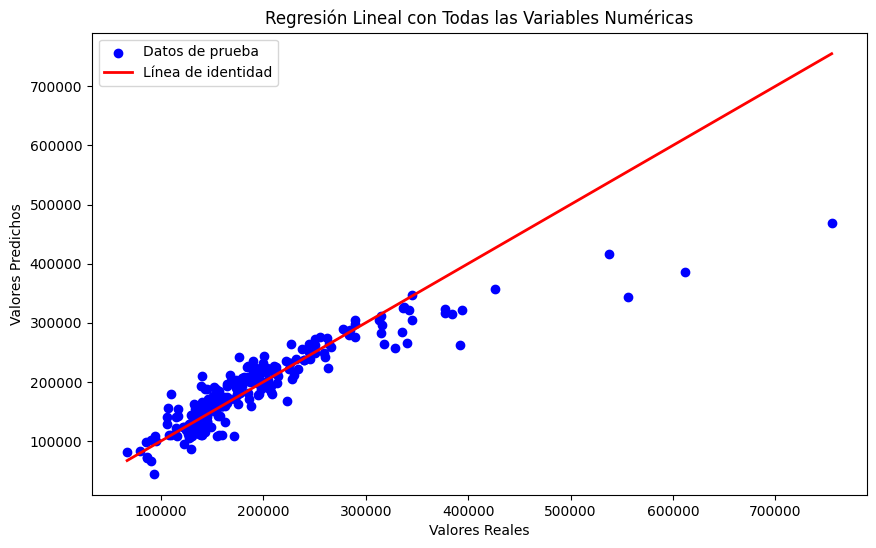

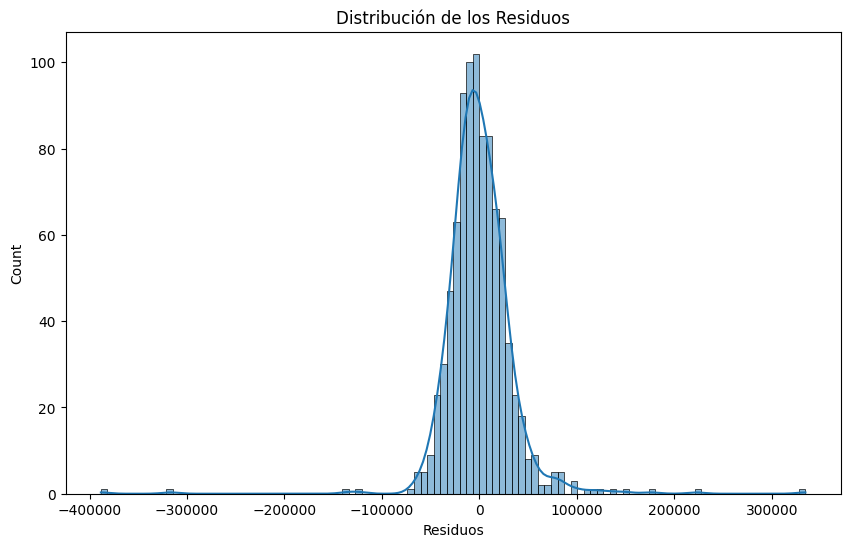

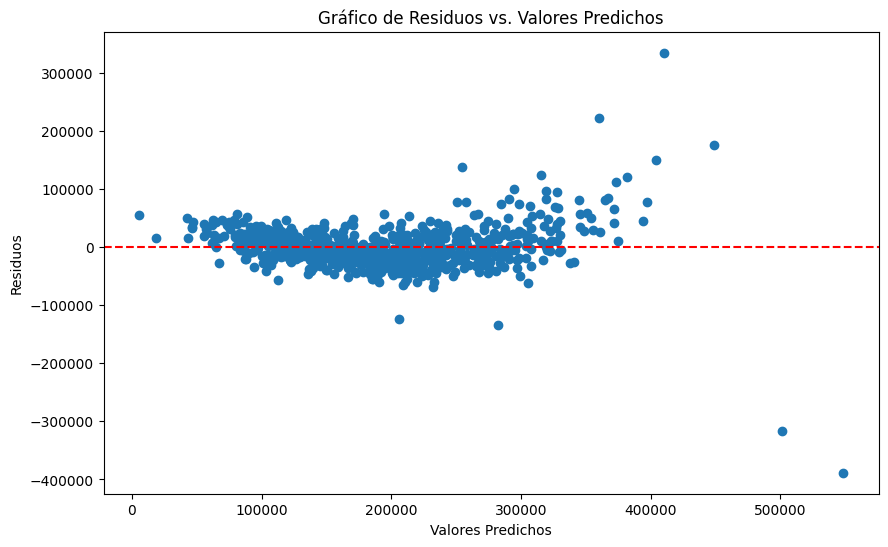

Estadístico de Shapiro-Wilk: 0.7723439393835041
p-valor: 1.815828217151199e-33


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

variables_numericas = df_numerico.select_dtypes(include=[np.number]).columns.tolist()

# Separar las variables independientes (X) y la variable dependiente (y)
X = df_numerico[variables_numericas].drop(columns=['SalePrice'])
y = df_numerico['SalePrice']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Analizar el modelo
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("Error cuadrático medio (MSE) en entrenamiento:", mean_squared_error(y_train, y_pred_train))
print("Error cuadrático medio (MSE) en prueba:", mean_squared_error(y_test, y_pred_test))
print("R^2 en entrenamiento:", r2_score(y_train, y_pred_train))
print("R^2 en prueba:", r2_score(y_test, y_pred_test))

# Resumen del modelo usando statsmodels
X_train_sm = sm.add_constant(X_train)  # Añadir constante para el intercepto
modelo_sm = sm.OLS(y_train, X_train_sm).fit()
print(modelo_sm.summary())

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Datos de prueba')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Línea de identidad')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal con Todas las Variables Numéricas')
plt.legend()
plt.show()

# Visualizar los residuos
residuos = y_train - y_pred_train
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los Residuos')
plt.show()

# Gráfico de residuos vs. valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos')
plt.show()

# Prueba de normalidad de los residuos
from scipy.stats import shapiro

stat, p_value = shapiro(residuos)
print('Estadístico de Shapiro-Wilk:', stat)
print('p-valor:', p_value)

---
# 9. Haga un análisis de correlación de las características del modelo y especifique si el modelo se adapta bien a los datos. Explique si hay sobreajuste (overfitting) o no.

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calcular VIF para cada variable en X_train
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Mostrar variables con VIF alto (usualmente > 5 indica alta multicolinealidad)
print(vif_data[vif_data["VIF"] > 5])

        Variable           VIF
2    LotFrontage  1.812263e+01
4    OverallQual  7.270390e+01
5    OverallCond  4.840910e+01
6      YearBuilt  2.525520e+04
7   YearRemodAdd  2.426244e+04
9     BsmtFinSF1           inf
10    BsmtFinSF2           inf
11     BsmtUnfSF           inf
12   TotalBsmtSF           inf
13      1stFlrSF           inf
14      2ndFlrSF           inf
15  LowQualFinSF           inf
16     GrLivArea           inf
19      FullBath  2.839607e+01
21  BedroomAbvGr  3.442732e+01
22  KitchenAbvGr  4.598122e+01
23  TotRmsAbvGrd  8.695639e+01
25   GarageYrBlt  2.645162e+04
26    GarageCars  3.793505e+01
27    GarageArea  3.261144e+01
35        MoSold  6.679642e+00
36        YrSold  2.481704e+04


c:\Users\angel\OneDrive\Documentos\.universidad\.2025\mineria\proyectos\Proyecto2.2-MDD\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


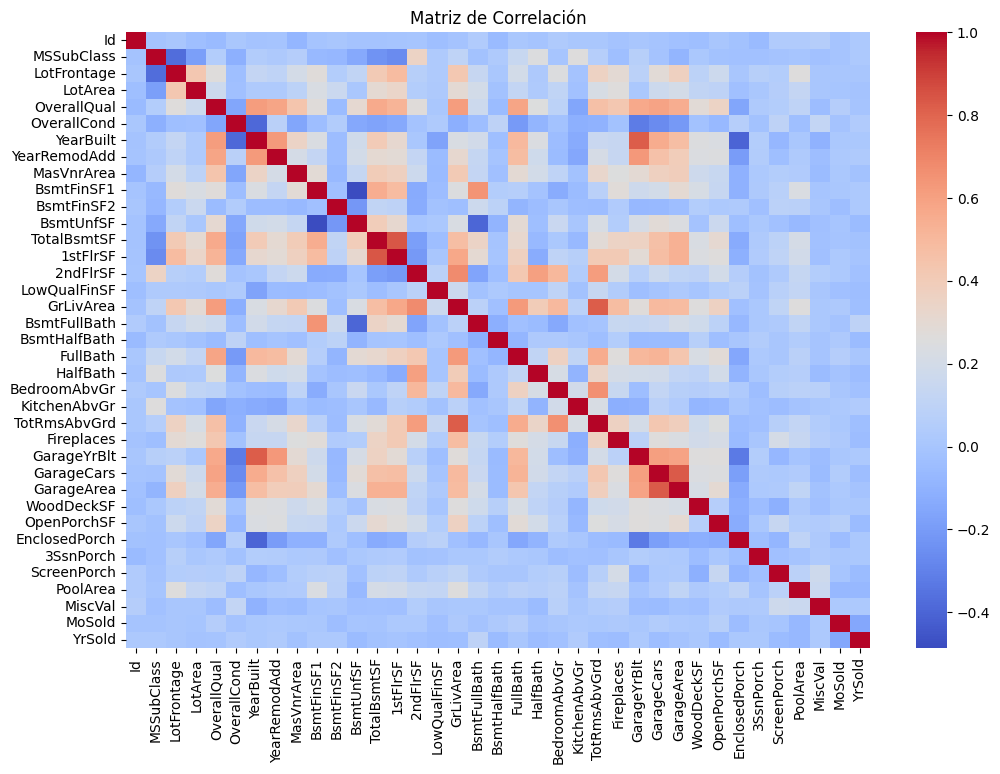

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=False, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()
corr_matrix = df_train.select_dtypes(include=["number"]).corr()
mejores_variables = corr_matrix["SalePrice"].abs().sort_values(ascending=False).head(10)
print(mejores_variables)

In [30]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Crear el modelo de regresión lineal
modelo_mejorado = LinearRegression()

# Realizar la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse_scores = cross_val_score(modelo_mejorado, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convertir a valores positivos
cv_mse_scores = -cv_mse_scores
mean_cv_mse = np.mean(cv_mse_scores)
std_cv_mse = np.std(cv_mse_scores)

print(f"Mean CV MSE: {mean_cv_mse:.2f} ± {std_cv_mse:.2f}")

# Calcular el MSE en el conjunto de entrenamiento
modelo_mejorado.fit(X_train, y_train)
y_pred_train_mejorado = modelo_mejorado.predict(X_train)
train_mse = mean_squared_error(y_train, y_pred_train_mejorado)

print(f"Train MSE: {train_mse:.2f}")

if train_mse < mean_cv_mse * 0.7:
    print("Posible overfitting")
elif mean_cv_mse > train_mse * 1.5:
    print("Alta probabilidad de overfitting.")
else:
    print("No overfitting detectado")

Mean CV MSE: 1845518107.69 ± 845781344.23
Train MSE: 1267134578.65
Posible overfitting


#### Interpretacion de resultados
Podemos observar que resultado del croos validation nos muestra un posible overfitting. El R2 de los datos de entrenamiento está por debajo del R2 del de prueba, pero está dentro del rango aceptable. A pesar de esto, en general el modelo parece adaptarse bien a los datos. A continuación se probarán otros modelos que ayuden a predecir mejor el modelo 

**Ajustar el modelo con Ridge para evitar el sobreajuste**

Ridge Regression:
Error cuadrático medio (MSE) en entrenamiento: 1267164224.6518025
Error cuadrático medio (MSE) en prueba: 1591085141.5172005
R^2 en entrenamiento: 0.8082104329882341
R^2 en prueba: 0.7982730579447054
Raíz del error cuadrático medio (RMSE) en prueba: 39888.408610988736


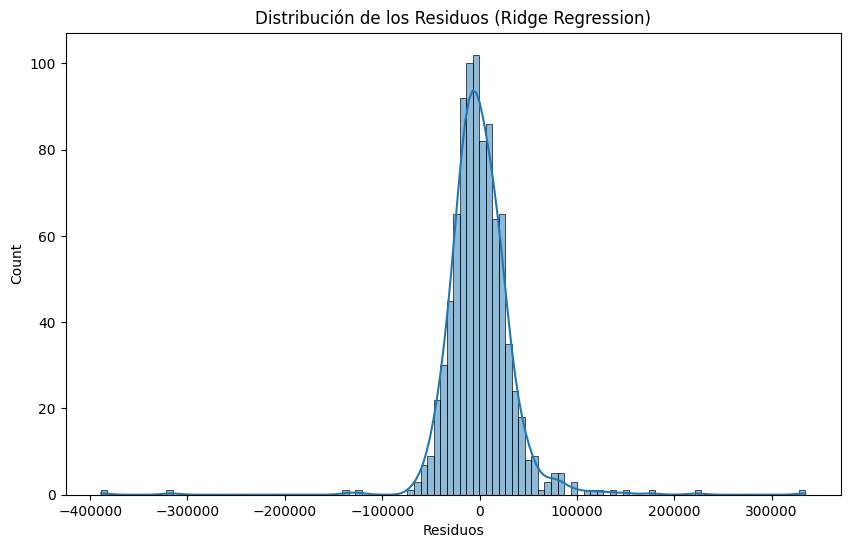

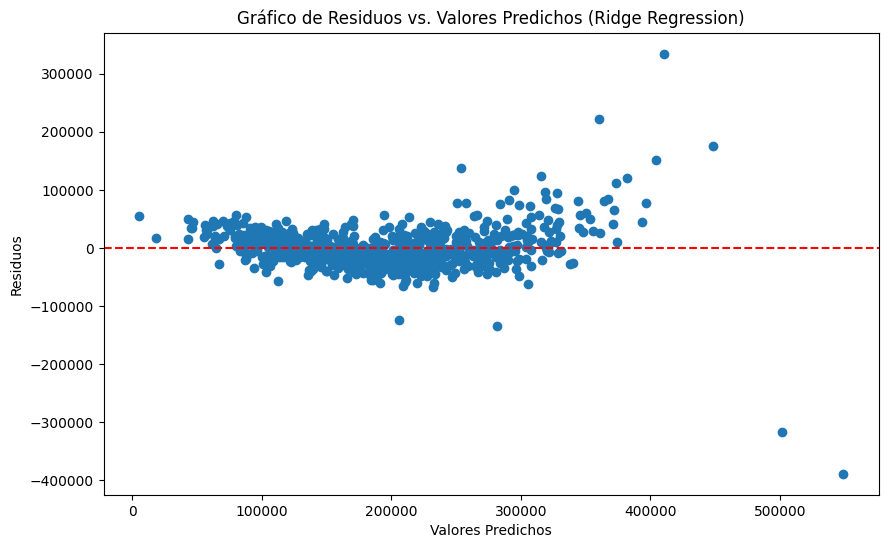

Estadístico de Shapiro-Wilk (Ridge Regression): 0.7717527586820601
p-valor (Ridge Regression): 1.680825627900959e-33
Cross-validation MSE scores (Ridge Regression): [-3.30330384e+09 -1.69942247e+09 -6.90762314e+08 -1.97256507e+09
 -1.56153685e+09]
Mean CV MSE (Ridge Regression): -1845518107.69 ± 845781344.23
Posible overfitting


In [31]:
from sklearn.linear_model import Ridge

df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

X = df_numerico.drop(columns=['SalePrice'])
y = df_numerico['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de Ridge Regression
modelo_ridge = Ridge(alpha=1.0)  
modelo_ridge.fit(X_train, y_train)

# Realizar predicciones con Ridge Regression
y_pred_train_ridge = modelo_ridge.predict(X_train)
y_pred_test_ridge = modelo_ridge.predict(X_test)

# Calcular métricas de rendimiento para Ridge Regression
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)

print("Ridge Regression:")
print("Error cuadrático medio (MSE) en entrenamiento:", mse_train_ridge)
print("Error cuadrático medio (MSE) en prueba:", mse_test_ridge)
print("R^2 en entrenamiento:", r2_train_ridge)
print("R^2 en prueba:", r2_test_ridge)
print("Raíz del error cuadrático medio (RMSE) en prueba:", rmse_test_ridge)

# Calcular los residuos
residuos_ridge = y_train - y_pred_train_ridge

plt.figure(figsize=(10, 6))
sns.histplot(residuos_ridge, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los Residuos (Ridge Regression)')
plt.show()

# Gráfico de residuos vs. valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train_ridge, residuos_ridge)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs. Valores Predichos (Ridge Regression)')
plt.show()

# Prueba de normalidad de los residuos
stat_ridge, p_value_ridge = shapiro(residuos_ridge)
print('Estadístico de Shapiro-Wilk (Ridge Regression):', stat_ridge)
print('p-valor (Ridge Regression):', p_value_ridge)

# Realizar la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse_scores_ridge = cross_val_score(modelo_ridge, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convertir a valores positivos
cv_mse_scores_ridge = -cv_mse_scores
mean_cv_mse_ridge = np.mean(cv_mse_scores_ridge)
std_cv_mse_ridge = np.std(cv_mse_scores_ridge)

print("Cross-validation MSE scores (Ridge Regression):", cv_mse_scores_ridge)
print(f"Mean CV MSE (Ridge Regression): {mean_cv_mse_ridge:.2f} ± {std_cv_mse_ridge:.2f}")

if train_mse < mean_cv_mse * 0.7:
    print("Posible overfitting")
elif mean_cv_mse > train_mse * 1.5:
    print("Alta probabilidad de overfitting.")
else:
    print("No overfitting detectado")

# 10. Si tiene multicolinealidad o sobreajuste, haga un modelo con las variables que sean mejores predictoras del precio de las casas. Determine la calidad del modelo realizando un análisis de los residuos. Muéstrelo gráficamente

Cross-Validation MSE: 1790219368.56 ± 589515191.20


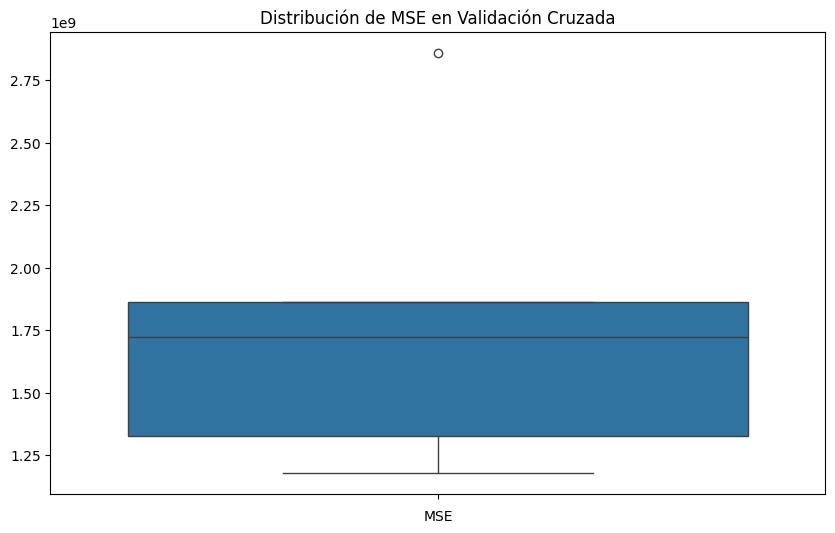

In [33]:
from sklearn.linear_model import Ridge

# Variables con menor colinealidad y mayor correlación
variables_relacionadas = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt"]

X_train_selected = X_train[variables_relacionadas]
X_test_selected = X_test[variables_relacionadas]

# Aplicar modelo Ridge para reducir multicolinealidad
ridge = Ridge(alpha=10)
ridge.fit(X_train_selected, y_train)

# Validación cruzada
cv_scores = cross_val_score(ridge, X_train_selected, y_train, scoring="neg_mean_squared_error", cv=5)
cv_mse = -cv_scores.mean()
cv_std = cv_scores.std()

print(f"Cross-Validation MSE: {cv_mse:.2f} ± {cv_std:.2f}")
plt.figure(figsize=(10, 6))
sns.boxplot(cv_scores * -1)
plt.title('Distribución de MSE en Validación Cruzada')
plt.xlabel('MSE')
plt.show()

# 2. Arbol de regresion para predecir el precio de las casas usando todas las variables

In [43]:
from sklearn.tree import DecisionTreeRegressor

df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

variables_numericas = df_numerico.select_dtypes(include=[np.number]).columns.tolist()

# Separar las variables independientes (X) y la variable dependiente (y)
X = df_numerico[variables_numericas].drop(columns=['SalePrice'])
y = df_numerico['SalePrice']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#modelo
modelo = DecisionTreeRegressor() 

# Entrenar el modelo
modelo.fit(X_train, y_train)


y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Analizar el modelo
print("Error cuadrático medio (MSE) en entrenamiento:", mean_squared_error(y_train, y_pred_train))
print("Error cuadrático medio (MSE) en prueba:", mean_squared_error(y_test, y_pred_test))
print("R^2 en entrenamiento:", r2_score(y_train, y_pred_train))
print("R^2 en prueba:", r2_score(y_test, y_pred_test))





Error cuadrático medio (MSE) en entrenamiento: 0.0
Error cuadrático medio (MSE) en prueba: 1770585942.9733334
R^2 en entrenamiento: 1.0
R^2 en prueba: 0.7755149120546045


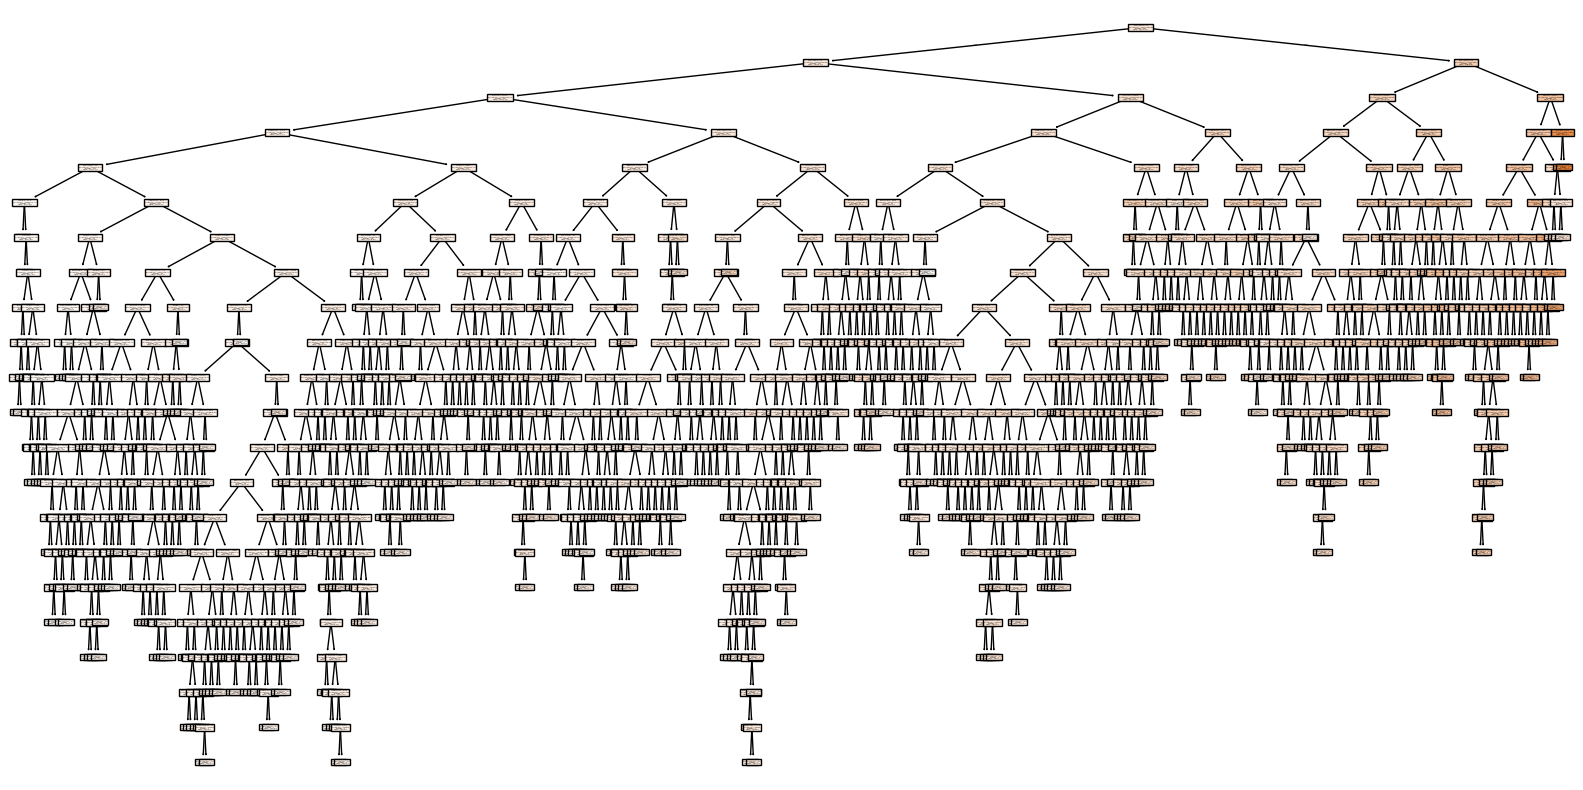

In [44]:
# Visualizar el árbol de regresión
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(modelo, filled=True, feature_names=X.columns)
plt.show()


# 3. Análisis del resultado

Al observar los resultados que el MSE es 0 y el R^2 es 1.  Mientras qwue el MSE en prueva es muy alto y el R^2 muy pequeño, lo que nos indica es que el modelo esta sobreajustado.
Por lo tanto, significa que el modelo ha aprendido bien los detalles y ruido del conjunto de entrenamiento, pero no generaliza bien los datos nuevos.

# 4. Haga, al menos, 3 modelos más, cambiando el parámetro de la profundidad del árbol. ¿Cuál es el mejor modelo para predecir el precio de las casas?

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Cargar datos
# df_train = pd.read_csv('path_to_your_data.csv')  # Asegúrate de cargar tus datos correctamente

df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

variables_numericas = df_numerico.select_dtypes(include=[np.number]).columns.tolist()

# Separar las variables independientes (X) y la variable dependiente (y)
X = df_numerico[variables_numericas].drop(columns=['SalePrice'])
y = df_numerico['SalePrice']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor())
])

# Definir el grid de parámetros
param_grid = {
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__min_samples_split': [2, 5, 10]
}

# Crear el modelo GridSearchCV
modelo1 = GridSearchCV(pipeline, param_grid=param_grid, n_jobs=2, cv=5, verbose=2, scoring='neg_mean_squared_error')

# Ajustar el modelo GridSearchCV
modelo1.fit(X_train, y_train)

#Resultados
print('-'*100)
print("Modelo 1")
print(f'Mejor configuracion del modelo 1: {modelo1.best_params_}')

#Entrenar el modelo con la mejor configuracion
best_model1 = modelo1.best_estimator_
best_model1.fit(X_train, y_train)

#predicciones
y_pred_train1 = best_model1.predict(X_train)
y_pred_test1 = best_model1.predict(X_test)

#aalizar el modelo

print("Error cuadrático medio (MSE) en entrenamiento:", mean_squared_error(y_train, y_pred_train1))
print("Error cuadrático medio (MSE) en prueba:", mean_squared_error(y_test, y_pred_test1))
print("R^2 en entrenamiento:", r2_score(y_train, y_pred_train1))
print("R^2 en prueba:", r2_score(y_test, y_pred_test1))

# Repetir para los otros dos modelos con diferentes configuraciones de hiperparámetros
param_grid2 = {
    'regressor__max_depth': [5, 10, 15],
    'regressor__min_samples_split': [2, 4, 6]
}

modelo2 = GridSearchCV(pipeline, param_grid=param_grid2, n_jobs=2, cv=5, verbose=2, scoring='neg_mean_squared_error')
modelo2.fit(X_train, y_train)
print('-'*100)
print("Modelo 2")
print(f'Mejor configuración del modelo 2: {modelo2.best_params_}')
best_model2 = modelo2.best_estimator_
best_model2.fit(X_train, y_train)
y_pred_train2 = best_model2.predict(X_train)
y_pred_test2 = best_model2.predict(X_test)

print("Error cuadrático medio (MSE) en entrenamiento:", mean_squared_error(y_train, y_pred_train2))
print("Error cuadrático medio (MSE) en prueba:", mean_squared_error(y_test, y_pred_test2))
print("R^2 en entrenamiento:", r2_score(y_train, y_pred_train2))
print("R^2 en prueba:", r2_score(y_test, y_pred_test2))

param_grid3 = {
    'regressor__max_depth': [10, 20, 30],
    'regressor__min_samples_split': [5, 10, 15]
}

modelo3 = GridSearchCV(pipeline, param_grid=param_grid3, n_jobs=2, cv=5, verbose=2, scoring='neg_mean_squared_error')
modelo3.fit(X_train, y_train)
print('-'*100)
print("Modelo 3")

print(f'Mejor configuración del modelo 3: {modelo3.best_params_}')
best_model3 = modelo3.best_estimator_
best_model3.fit(X_train, y_train)
y_pred_train3 = best_model3.predict(X_train)
y_pred_test3 = best_model3.predict(X_test)

print("Error cuadrático medio (MSE) en entrenamiento:", mean_squared_error(y_train, y_pred_train3))
print("Error cuadrático medio (MSE) en prueba:", mean_squared_error(y_test, y_pred_test3))
print("R^2 en entrenamiento:", r2_score(y_train, y_pred_train3))
print("R^2 en prueba:", r2_score(y_test, y_pred_test3))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------------------------------------------------------------------------------------------------
Modelo 1
Mejor configuracion del modelo 1: {'regressor__max_depth': 7, 'regressor__min_samples_split': 5}
Error cuadrático medio (MSE) en entrenamiento: 317451164.0812755
Error cuadrático medio (MSE) en prueba: 1666192363.3816075
R^2 en entrenamiento: 0.9519526986936055
R^2 en prueba: 0.7887505315898129
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------------------------------------------------------------------------------------------------
Modelo 2
Mejor configuración del modelo 2: {'regressor__max_depth': 15, 'regressor__min_samples_split': 4}
Error cuadrático medio (MSE) en entrenamiento: 37651575.75643069
Error cuadrático medio (MSE) en prueba: 1941456350.5178044
R^2 en entrenamiento: 0.9943013073829315
R^2 en prueba: 0.7538509772328517
Fitting 5 folds for each of 9 candidates, totalling 45 fits
------

Al observar las metricas de los 3 modelos, el error más bajo del MSE es el que tiene un mejor rendimiento, en este caso es el modelo 2. Mientras que con en el R^2 más alto indica mejor la variabilidad de los datos. En este caso, también es el modelo 2. Por lo tanto, el modelo 2 es el mejor modelo para predecir el precio de las casas.

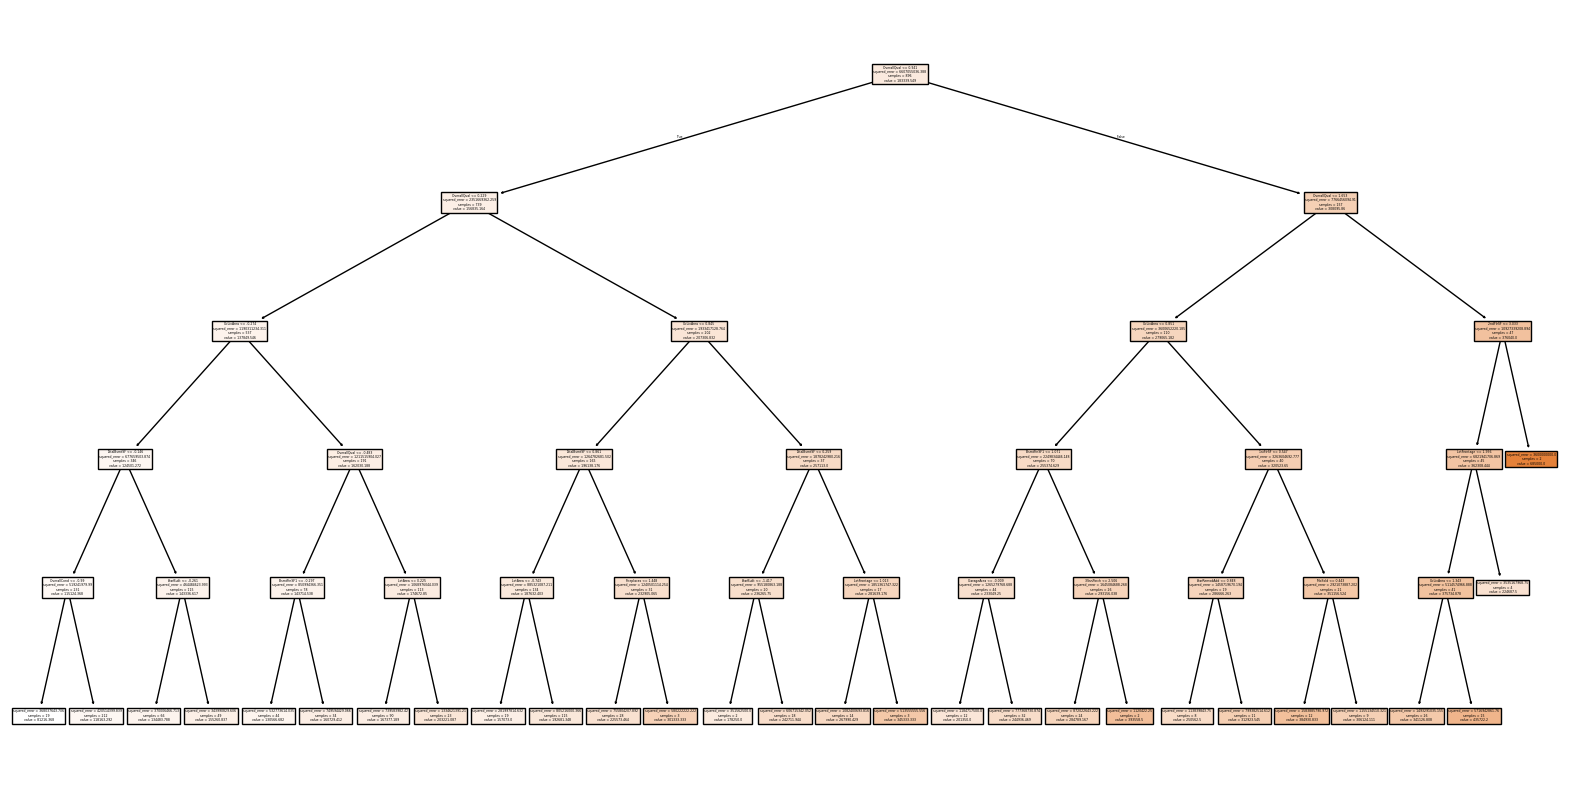

In [63]:
# arbol para el mejor modelo
plt.figure(figsize=(20, 10))
plot_tree(best_model2.named_steps['regressor'], filled=True, feature_names=X.columns)
plt.show()


Al comparar entre los resultados de la regresion lineal y el árbol de regresión el MSE, tiene un mejor rendimiento el de la regresión lineal con un valor más bajo. Mientras que en el coeficiente ed determinación R^2 más alto indica una mejor variabilidad, en esta caso el de la regresión lineal es más alto. Y el RMSE, tiene un valor más bajo. Por lo tanto, el modelo con la regresion lineal con sobreajuste parece ser un mejor modelo.

# 6. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv')

# Display the first few rows of the DataFrame to verify loading
df.head()
# Determine the thresholds for Economic, Intermediate, and Expensive houses
# Using quantiles to define the thresholds
q1 = df['price'].quantile(0.33)
q2 = df['price'].quantile(0.66)

print(f"Threshold for Economic houses: <= {q1}")
print(f"Threshold for Intermediate houses: > {q1} and <= {q2}")
print(f"Threshold for Expensive houses: > {q2}")

# Create a new column 'price_category' based on the thresholds
df['price_category'] = pd.cut(df['price'], bins=[-np.inf, q1, q2, np.inf], labels=['Economic', 'Intermediate', 'Expensive'])

# Display the first few rows to verify the new column
df.head()
# Count the number of houses in each price category
price_category_counts = df['price_category'].value_counts()

# Plot the distribution of price categories using a bar plot
plt.figure(figsize=(10, 6))
price_category_counts.plot(kind='bar', color=['green', 'blue', 'red'], alpha=0.7)
plt.title('Distribution of House Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Number of Houses')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Plot the distribution of price categories using a pie chart
plt.figure(figsize=(10, 6))
price_category_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'blue', 'red'], startangle=140)
plt.title('Distribution of House Price Categories')
plt.ylabel('')
plt.show()

# 7. 

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the target for the test set
y_pred = clf.predict(X_test)

# Evaluate the model

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.show()
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1:.2f}')

# Export the decision tree to a DOT format
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=clf.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True)  

# Use graphviz to render the tree
graph = graphviz.Source(dot_data)  
graph.render("classification_tree")  # Save the tree as a PDF file
graph  # Display the tree in the notebook